In [2]:
import cv2
from matplotlib import pyplot as plt
from lane_detection import *
from lane_following import *

In [3]:
IP_ADDRESS = "192.168.1.102"

In [4]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 1
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()
    
    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        lines = detect_lines(frame, 200, 250, 3, 180, 10)
        # try:
        #     lanes = detect_lanes(lines)
        #     # print ("tried to detect lanes")
        #     closest_lane = get_center_lane(lanes)
        #     img = draw_lane(img, closest_lane, (255, 0, 0))
        #     img = draw_lines(img, lines, (0, 255, 0))
        #     avg_x_intercept, avg_slope = get_lane_center(closest_lane)
        #     x = closest_lane[0][2]
        #     y = closest_lane[0][3]
        #     cv2.line(
        #                 img,
        #                 (int(avg_x_intercept), 1080),
        #                 (int(x), int(y)),
        #                 (0, 0, 255),
        #                 3,
        #             )
        #     print(recommend_direction(avg_x_intercept, avg_slope))
        #     plt.imshow(img)
        # except:
        #     pass

vcap.release()

 got a frame 


In [4]:
img = plt.imread("/home/keshav/cv-intro/media/frame.png")
type(img)

numpy.ndarray

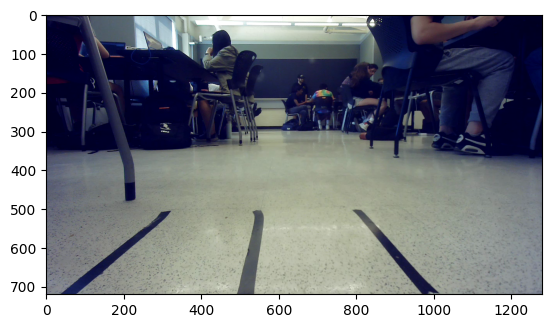

In [5]:
plt.imshow(img)

In [6]:
# vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

# img = None

# try:
#     while True:
#         ret, frame = vcap.read()
#         if ret:
#             print(" YOU GOT THIS ")
#             print(frame.shape)
#             lines = detect_lines(frame, 50, 90, 3, 150, 10)
#             try:
#                 lanes = detect_lanes(lines)
#                 # print ("tried to detect lanes")
#                 closest_lane = get_center_lane(lanes)
#                 frame = draw_lane(frame, closest_lane, (255, 0, 0))
#                 frame = draw_lines(frame, lines, (0, 255, 0))
#                 avg_x_intercept, avg_slope = get_lane_center(closest_lane)
#                 x = closest_lane[0][2]
#                 y = closest_lane[0][3]
#                 cv2.line(
#                         frame,
#                         (int(avg_x_intercept), 1080),
#                         (int(x), int(y)),
#                         (0, 0, 255),
#                         3,
#                     )
#                 print(recommend_direction(avg_x_intercept, avg_slope))
#                 plt.imshow(frame)
#             except:
#                 pass

#         else:
#             pass

# except KeyboardInterrupt:
#         # Close the connection
#     vcap.release()

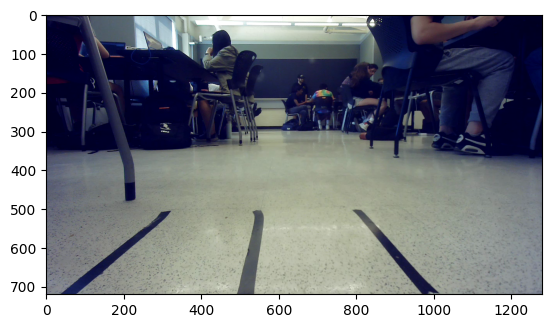

In [6]:
plt.imshow(img)

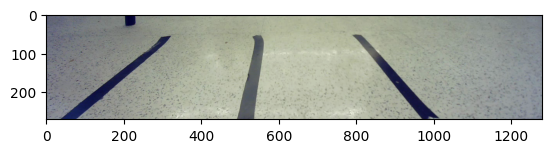

In [10]:
slice_img = img[450: img.shape[0]]
slice_img = slice_img - slice_img.min() # Now between 0 and 8674
slice_img = slice_img / slice_img.max() * 255
arr = np.uint8(slice_img)
plt.imshow(arr)


In [12]:
lines = detect_lines(arr, 190, 240, 3, 150, 15)


tried to detect lanes
go left + turn right


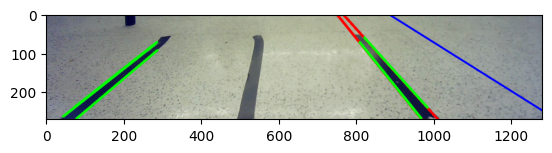

In [14]:
lanes = detect_lanes(lines)
print ("tried to detect lanes")
closest_lane = get_center_lane(lanes)
arr = draw_lane(arr, closest_lane, (255, 0, 0))
arr = draw_lines(arr, lines, (0, 255, 0))
avg_x_intercept, avg_slope = get_lane_center(closest_lane)
x = closest_lane[0][2]
y = closest_lane[0][3]
cv2.line(
                        arr,
                        (int(avg_x_intercept), 1080),
                        (int(x), int(y)),
                        (0, 0, 255),
                        3,
                    )
print(recommend_direction(avg_x_intercept, avg_slope))
plt.imshow(arr)